In [1]:
from datetime import date, timedelta
import pandas as pd
from cmdty_storage import CmdtyStorage, \
    intrinsic_value, multi_factor_value


In [2]:
def create_piecewise_flat_series(data, dt_index, freq):
    period_index = pd.PeriodIndex([pd.Period(dt, freq=freq) for dt in dt_index])
    return pd.Series(data, period_index).resample(freq).fillna('pad')

In [3]:
constraints =   [
                    (date(2019, 8, 28), 
                                [
                                    (0.0, -150.0, 255.2),
                                    (2000.0, -200.0, 175.0),
                                ]),
                    (date(2019, 9, 10), 
                             [
                                 (0.0, -170.5, 235.8),
                                 (700.0, -180.2, 200.77),
                                 (1800.0, -190.5, 174.45),
                            ])
                ]

storage_start = date(2019, 8, 28)
storage_end = date(2019, 9, 25)
constant_injection_cost = 0.015
constant_pcnt_consumed_inject = 0.0001
constant_withdrawal_cost = 0.02
constant_pcnt_consumed_withdraw = 0.000088
constant_pcnt_inventory_loss = 0.001;
constant_pcnt_inventory_cost = 0.002;

cmdty_storage = CmdtyStorage('D', storage_start, storage_end, constant_injection_cost, constant_withdrawal_cost, constraints, 
                        cmdty_consumed_inject=constant_pcnt_consumed_inject, cmdty_consumed_withdraw=constant_pcnt_consumed_withdraw,
                        inventory_loss=constant_pcnt_inventory_loss, inventory_cost=constant_pcnt_inventory_cost)

inventory = 650.0
val_date = date(2019, 9, 2)

forward_curve = create_piecewise_flat_series([58.89, 61.41, 59.89, 59.89], 
                          [val_date, date(2019, 9, 12), date(2019, 9, 18), storage_end], freq='D')

flat_interest_rate = 0.03
interest_rate_curve = pd.Series(index = pd.period_range(val_date, storage_end + timedelta(days=50), freq='D'), dtype='float64')
interest_rate_curve[:] = flat_interest_rate

twentieth_of_next_month = lambda period: period.asfreq('M').asfreq('D', 'end') + 20
intrinsic_results = intrinsic_value(cmdty_storage, val_date, inventory, forward_curve, 
                settlement_rule=twentieth_of_next_month, interest_rates=interest_rate_curve, 
                                    num_inventory_grid_points=100)

In [4]:
print("Storage Intrinsic NPV")
print("{:,.2f}".format(intrinsic_results.npv) )

Storage Intrinsic NPV
40,421.33


In [5]:
%matplotlib qt
ax = forward_curve.plot(legend=True)
ax.legend("Forward Curve")
intrinsic_results.profile.plot()

In [6]:
intrinsic_results.profile

,inventory,inject_withdraw_volume,cmdty_consumed,inventory_loss,net_volume,period_pv
2019-09-02,483.100000,-166.250000,0.014630,0.650000,166.235370,9746.430038
2019-09-03,320.539400,-162.077500,0.014263,0.483100,162.063237,9502.118147
2019-09-04,320.218861,0.000000,0.000000,0.320539,-0.000000,-0.640973
2019-09-05,562.257865,242.359224,0.024236,0.320219,-242.383460,-14222.033934
2019-09-06,794.349067,232.653460,0.023265,0.562258,-232.676725,-13652.993112
2019-09-07,1016.901320,223.346602,0.022335,0.794349,-223.368937,-13107.339799
2019-09-08,1230.306676,214.422257,0.021442,1.016901,-214.443699,-12584.112769
2019-09-09,1434.941072,205.864702,0.020586,1.230307,-205.885289,-12082.390303
2019-09-10,1616.690995,183.184865,0.018318,1.434941,-183.203183,-10751.969090
2019-09-11,1793.910389,178.836085,0.017884,1.616691,-178.853968,-10497.149889


#### Trinomial Tree Valuation Example

In [7]:
from cmdty_storage import trinomial_value, trinomial_deltas

# Trinomial Tree parameters
mean_reversion = 14.5
spot_volatility = create_piecewise_flat_series([1.35, 1.13, 1.24, 1.24],
                           [val_date, date(2019, 9, 12), date(2019, 9, 18), storage_end], freq='D')
time_step = 1.0/365.0

trinomial_value = trinomial_value(cmdty_storage, val_date, inventory, forward_curve,
                spot_volatility, mean_reversion, time_step,
                 settlement_rule=twentieth_of_next_month,
                interest_rates=interest_rate_curve, num_inventory_grid_points=100)

print("Storage Trinomial Tree Model NPV")
print("{:,.2f}".format(trinomial_value) )

# Delta
# Can specify the forward points to calculate delta for in several different ways as demonstrated below
delta_fwd_contracts = [
    date(2019, 8, 29),
    '2019-08-29',
    pd.Period(year=2019, month=9, freq='M'),
    (date(2019, 8, 29), date(2019, 8, 30)),
    ('2019-09-01', '2019-09-10'),
    (pd.Period(year=2019, month=9, day=11, freq='D'), pd.Period(year=2019, month=9, day=25, freq='D'))
]
trinomial_deltas = trinomial_deltas(cmdty_storage, val_date, inventory, forward_curve,
                spot_volatility, mean_reversion, time_step,
                fwd_contracts=delta_fwd_contracts,
                 settlement_rule=twentieth_of_next_month,
                interest_rates=interest_rate_curve, num_inventory_grid_points=100)
print("")
print("Storage Trinomial Tree Model Deltas")
print(trinomial_deltas)

Storage Trinomial Tree Model NPV
42,844.28

Storage Trinomial Tree Model Deltas
[0.0, 0.0, 687.4069396872073, 0.0, -439.5333366119302, 1126.9402762991376]


### Multi-Factor Least Squares Monte Carlo Example
Creating the storage objects.

In [8]:
from cmdty_storage import CmdtyStorage
import pandas as pd
storage_simple = CmdtyStorage(
    freq='D',
    storage_start = '2021-04-01',
    storage_end = '2022-04-01',
    injection_cost = 0.1,
    withdrawal_cost = 0.25,
    min_inventory = 0.0,
    max_inventory = 1500.0,
    max_injection_rate = 25.5,
    max_withdrawal_rate = 30.9
)

storage_with_ratchets = CmdtyStorage(
    freq='D',
    storage_start = '2021-04-01',
    storage_end = '2022-04-01',
    injection_cost = 0.1,
    withdrawal_cost = 0.25,
    constraints= [
                ('2021-04-01', # For days after 2021-04-01 (inclusive) until 2022-10-01 (exclusive):
                       [
                            (0.0, -150.0, 250.0),    # At min inventory of zero, max withdrawal of 150, max injection 250
                            (2000.0, -200.0, 175.0), # At inventory of 2000, max withdrawal of 200, max injection 175
                            (5000.0, -260.0, 155.0), # At inventory of 5000, max withdrawal of 260, max injection 155
                            (7000.0, -275.0, 132.0), # At max inventory of 7000, max withdrawal of 275, max injection 132
                        ]),
                  ('2022-10-01', # For days after 2022-10-01 (inclusive):
                       [
                            (0.0, -130.0, 260.0),    # At min inventory of zero, max withdrawal of 130, max injection 260
                            (2000.0, -190.0, 190.0), # At inventory of 2000, max withdrawal of 190, max injection 190
                            (5000.0, -230.0, 165.0), # At inventory of 5000, max withdrawal of 230, max injection 165
                            (7000.0, -245.0, 148.0), # At max inventory of 7000, max withdrawal of 245, max injection 148
                        ]),
                 ]
)



In [11]:
from cmdty_storage import three_factor_seasonal_value

# Creating the Inputs
monthly_index = pd.period_range(start='2021-04-25', periods=25, freq='M')
monthly_fwd_prices = [16.61, 15.68, 15.42, 15.31, 15.27, 15.13, 15.96, 17.22, 17.32, 17.66, 
                      17.59, 16.81, 15.36, 14.49, 14.28, 14.25, 14.32, 14.33, 15.30, 16.58, 
                      16.64, 16.79, 16.64, 15.90, 14.63]
fwd_curve = pd.Series(data=monthly_fwd_prices, index=monthly_index).resample('D').fillna('pad')

rates = [0.005, 0.006, 0.0072, 0.0087, 0.0101, 0.0115, 0.0126]
rates_pillars = pd.PeriodIndex(freq='D', data=['2021-04-25', '2021-06-01', '2021-08-01', '2021-12-01', '2022-04-01', 
                                              '2022-12-01', '2023-12-01'])
ir_curve = pd.Series(data=rates, index=rates_pillars).resample('D').asfreq('D').interpolate(method='linear')

def settlement_rule(delivery_date):
    return delivery_date.asfreq('M').asfreq('D', 'end') + 20

# Call the three-factor seasonal model
three_factor_results = three_factor_seasonal_value(
    cmdty_storage = storage_with_ratchets,
    val_date = '2021-04-25',
    inventory = 1500.0,
    fwd_curve = fwd_curve,
    interest_rates = ir_curve,
    settlement_rule = settlement_rule,
    num_sims = 2000,
    seed = 12,
    spot_mean_reversion = 91.0,
    spot_vol = 0.85,
    long_term_vol =  0.30,
    seasonal_vol = 0.19,
    basis_funcs = '1 + x_st + x_sw + x_lt + s + x_st**2 + x_sw**2 + x_lt**2 + s**2 + s * x_st',
    discount_deltas = True
)

# Inspect the NPV results
print('Full NPV:\t{0:,.0f}'.format(three_factor_results.npv))
print('Intrinsic NPV: \t{0:,.0f}'.format(three_factor_results.intrinsic_npv))
print('Extrinsic NPV: \t{0:,.0f}'.format(three_factor_results.extrinsic_npv))

Full NPV:	69,496
Intrinsic NPV: 	38,446
Extrinsic NPV: 	31,049


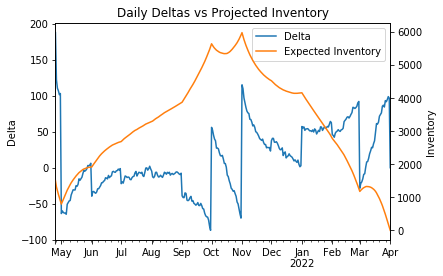

In [47]:
%matplotlib inline
ax_deltas = three_factor_results.deltas.plot(title='Daily Deltas vs Projected Inventory', legend=True, label='Delta')
ax_deltas.set_ylabel('Delta')
inventory_projection = three_factor_results.expected_profile['inventory']
ax_inventory = inventory_projection.plot(secondary_y=True, legend=True, ax=ax_deltas, label='Expected Inventory')
h1, l1 = ax_deltas.get_legend_handles_labels()
h2, l2 = ax_inventory.get_legend_handles_labels()
ax_inventory.set_ylabel('Inventory')
ax_deltas.legend(h1+h2, l1+l2, loc=1)

Plot the trigger prices.

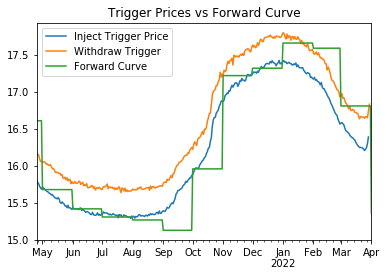

In [48]:
%matplotlib inline
ax_triggers = three_factor_results.trigger_prices['inject_trigger_price'].plot(
    title='Trigger Prices vs Forward Curve', legend=True)
three_factor_results.trigger_prices['withdraw_trigger_price'].plot(legend=True)
fwd_curve['2021-04-25' : '2022-04-01'].plot(legend=True)
ax_triggers.legend(['Inject Trigger Price', 'Withdraw Trigger', 'Forward Curve'])